# Second order PID

In [1]:
import numpy as np
import sympy as sym
import control as ct
from control.matlab import *
import matplotlib.pyplot as plt

sym.init_printing()

In [56]:
z, Wn, Kp, Ti, Td , B, a0, a1, b0= sym.symbols('zeta omega_n K_p T_i T_d beta a_0 a_1 b_0')

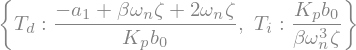

In [57]:
eq1 = sym.Eq((2*B*z**2 + 1)*Wn**2, a0+Kp*b0);
eq2 = sym.Eq(B*z*Wn**3 , (Kp*b0)/Ti);
eq3 = sym.Eq((B + 2)*z*Wn, Kp*Td*b0 + a1)
sym.solve((eq1, eq2, eq3),(Ti, Td))

Process:

        2.987e+04
-------------------------
s^2 + 414.7 s + 3.361e+04

Step response:


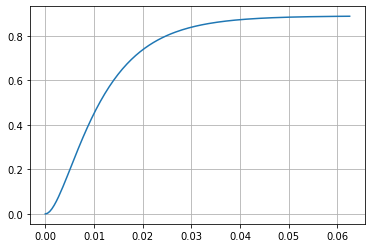

Step info:


{'RiseTime': 0.0217480341475997,
 'SettlingTime': 0.039871395937266116,
 'SettlingMin': 0.8000456798025747,
 'SettlingMax': 0.8873280912347106,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.8873280912347106,
 'PeakTime': 0.06252559817434913,
 'SteadyStateValue': 0.8887235941684023}

In [2]:
# System
num = [29870]
den = [1, 414.7, 33610]
G = ct.tf(num,den)
print('Process:')
print(G)

t, out = ct.step_response(G) 
print('Step response:')
plt.plot(t, out)
plt.grid()
plt.show()

print('Step info:')
stepinfo(G)

In [3]:
# Damping and natural frequency
ct.damp(G);

_____Eigenvalue______ Damping___ Frequency_
    -304.2                     1      304.2
    -110.5                     1      110.5


Poles:  [-304.22116444 -110.47883556]


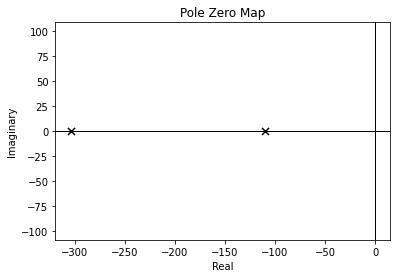

In [4]:
# Root locust
print('Poles: ', ct.pole(G))
ct.pzmap(G);

In [5]:
# Data
tss = 0.03
Mp = 25
B = 10

b0 = float(num[0])
a1 = float(den[1])
a0 = float(den[2])

In [6]:
# Requirements
z = np.sqrt(np.square(np.log(Mp/100))/(np.pi**2 + np.square(np.log(Mp/100)))) 
Wn = 3/(z*ts)

print('z= ', z)
print('Wn= ', Wn)

z=  0.40371275194342066
Wn=  247.7008702811913


In [7]:
# Desired characteristic equation and poles
print('delta = s² + {a}s + {b:1.4f}'.format(a=2*z*Wn,b=Wn**2))
print('s = {a} + j{b:1.4}'.format(a=-z*Wn, b=Wn*np.sqrt(1-z**2)))

delta = s² + 200.0s + 61355.7211
s = -100.0 + j226.6


In [8]:
# PID controller
Kp = ((2*B*z**2 + 1)*Wn**2 - a0)/b0
Ti = (Kp*b0)/(B*z*Wn**3)
Td = (((B + 2)*z*Wn) - a1)/(Kp*b0)

print(f'Kp: {Kp}, Ti: {Ti}, Td: {Td}')

Gc = ct.tf([Kp*Td*Ti, Kp*Ti, Kp],[Ti, 0])
print('PID-control system:')
print(Gc)

Kp: 7.624563814464665, Ti: 0.0037118905444139035, Td: 0.0034481438161639523
PID-control system:

9.759e-05 s^2 + 0.0283 s + 7.625
--------------------------------
           0.003712 s



Step response:


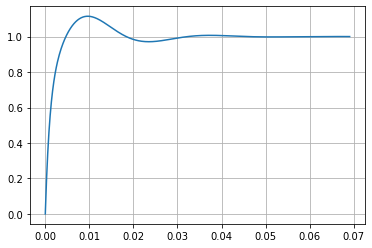

Step info:


{'RiseTime': 0.0031775674283317803,
 'SettlingTime': 0.027216555799189596,
 'SettlingMin': 0.9097901730555858,
 'SettlingMax': 1.1149079307048033,
 'Overshoot': 11.490793070480333,
 'Undershoot': 0,
 'Peak': 1.1149079307048033,
 'PeakTime': 0.009670857390574984,
 'SteadyStateValue': 1.0}

In [9]:
# PID response
sys = ct.feedback(Gc*G)
t, out = ct.step_response(sys)
print('Step response:')
plt.plot(t,out)
plt.grid()
plt.show()

print('Step info:')
stepinfo(sys)

Poles:  [-1000.  +0.j          -100.+226.61800709j  -100.-226.61800709j]


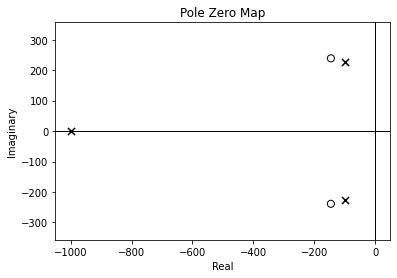

In [145]:
ct.pzmap(sys);
print('Poles: ',ct.pole(sys))

In [ ]:
Gc = ct.tf([Kp*Td*Ti, Kp*Ti, Kp],[Ti, 0])
# PID response
sys = ct.feedback(Gc*G)
t, out = ct.step_response(sys)
print('Step response:')
plt.plot(t,out)
plt.grid()
plt.show()

In [10]:
tf1 = ct.tf([1],[1,2])
tf2 = ct.tf([3],[1,0])
tf1+tf2

TransferFunction(array([4, 6]), array([1, 2, 0]))